<a href="https://colab.research.google.com/github/lmquann/DoAnPTDLPython2022/blob/main/DOAN_ThongKeSuyDien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/Diet_R.csv")
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


Xóa các dữ liệu trống:

In [ ]:
df.replace(" ", np.nan, inplace=True) #chuyển đổi các ô trống sang NaN
df.dropna(inplace=True) #Xóa các hàng có giá trị NaN
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


# Các hàm phân tích ANOVA

**Kiểm tra phân phối chuẩn:**

Phát biểu giả thiết:

H0: mẫu tuân theo phân phối chuẩn

H1: Mẫu không tuân theo phân phối chuẩn

In [5]:
def shapiro(data): # kiểm tra phân phối chẩn hay không
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    for j in series:
        sts, p = stats.shapiro(j)
        if p > 0.05:
            print(f'không có bằng chứng để bác bỏ giả thiết H0: mẫu {j.name} tuân theo phân phối chuẩn')
        else:
            print(f'có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: mẫu {j.name} không tuân theo phân phối chuẩn')
    print()

In [6]:
#đánh giá qua biểu đồ:
def hist(data):
  series = []
  id = 0
  for i in data.columns:
        series.append(data[i].dropna())
  fig, ax = plt.subplots(ncols=len(data.columns), figsize=(20,4))
  for j in series:
        mean = np.mean(data[j.name])
        # ddof=1 :: hiệu chỉnh
        std = np.std(data[j.name], ddof=1)
        domain = np.linspace(np.min(data[j.name]), np.max(data[j.name]))
        ax[id].plot(domain, stats.norm.pdf(domain, mean, std))
        #density=True :: chuẩn hóa dữ liệu về normal
        ax[id].hist(data[j.name], edgecolor='green', density=True)
        ax[id].title.set_text(j.name)
        id = id + 1
  fig.show()
def qq_plot(data):
  series = []
  id = 0
  for i in data.columns:
        series.append(data[i].dropna())
  fig, ax = plt.subplots(ncols=len(data.columns), figsize=(20,4))
  for j in series:
    sm.qqplot(data[j.name], fit=True, line ='45', ax= ax[id])
    ax[id].title.set_text(j.name)
    id = id + 1
  fig.show()

**Kiểm tra tính đồng nhất phương sai:**

Phát biểu giả thiết:

H0: Phương sai đồng nhất

H1: phương sai không đồng nhất

In [7]:
def levene(data): # khiểm tra tính đồng nhất phương sai
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    sts, p = stats.levene(*series)
    if p > 0.05:
        print(f'không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất\n')
    else:
        print(f'có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: phương sai không đồng nhất\n')

**Kiểm tra tính đồng nhất về giá trị trung bình:**

Phát biểu giả thiết:

H0: các giá trị trung bình bằng nhau

H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau

In [8]:
def anova(data):
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    sts, p = stats.f_oneway(*series)
    if p > 0.05:
        print('không có bằng chứng để bác bỏ giả thiết H0: các giá trị trung bình bằng nhau')
    else:
        print('có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau')

In [9]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

**Tiến hành phân tích:**

**Ignore diet and test to see if weight has been lost (Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa?)**

phát biểu giả thiết:

h0: Cân nặng trước khi kiểm tra và sau khi kiểm tra bằng nhau

h1: Cân nặng trước khi kiểm tra và sau khi kiểm tra khác nhau

In [10]:
stat, p = stats.ttest_rel(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p)
if p > 0.05:
    print("không có bằng chứng để bác bỏ giả thiết H0: Cân nặng trước khi kiểm tra và sau khi kiểm tra bằng nhau")
else:
    print("có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Cân nặng trước khi kiểm tra và sau khi kiểm tra khác nhau")

Stat = 13.728486740903172 P_value = 3.7220652146643845e-22
có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Cân nặng trước khi kiểm tra và sau khi kiểm tra khác nhau


Text(0.5, 1.0, 'Weight before and after diet')

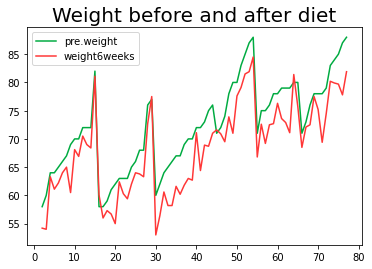

In [11]:
# Biểu đồ cân nặng trước và sau khi giảm cân
df[['pre.weight', 'weight6weeks']].plot(color= ['#00ab41','#ff3737'])
plt.title('Weight before and after diet', fontsize=20)

**Remove weight lost and get students to calculate it using before/after weights**

In [12]:
weight_lost = df["pre.weight"] - df["weight6weeks"] 
df['weightlost'] = weight_lost.values
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
40,62,0,31,170,72,3,71.1,0.9
8,7,0,37,174,67,1,65.0,2.0
48,18,1,50,160,78,1,73.9,4.1
46,16,1,31,158,72,1,70.9,1.1
73,74,1,35,183,83,3,80.2,2.8
50,20,1,25,165,80,1,77.6,2.4
63,49,1,37,198,79,2,71.1,7.9
55,41,1,51,191,71,2,66.8,4.2
71,72,1,26,179,78,3,69.4,8.6
42,64,0,56,171,73,3,68.9,4.1


**Summary statistics by diet**

In [13]:
# phân nhóm giá trị weightlost theo diet
weightlost_1 = df[(df['Diet'] == 1)]["weightlost"]
weightlost_2 = df[(df['Diet'] == 2)]["weightlost"]
weightlost_3 = df[(df['Diet'] == 3)]["weightlost"]
weight_lost = list(zip(weightlost_1, weightlost_2, weightlost_3))
df_diet =  pd.DataFrame(weight_lost, columns = ("Diet 1", "Diet 2", "Diet 3"))
df_diet.sample(10)

,Diet 1,Diet 2,Diet 3
17,4.1,3.5,3.5
10,1.5,4.2,0.9
23,3.5,-1.4,4.1
8,1.9,3.0,7.0
7,8.5,3.6,7.2
0,3.8,-2.1,7.0
2,0.7,1.7,3.4
9,3.1,2.0,7.3
5,2.0,0.6,5.4
15,1.1,2.4,2.5


        min  max      mean  median       std
Diet 1 -0.6  9.0  3.300000    3.05  2.240148
Diet 2 -2.1  7.9  3.225000    3.40  2.507944
Diet 3  0.5  8.6  4.933333    5.20  2.384309




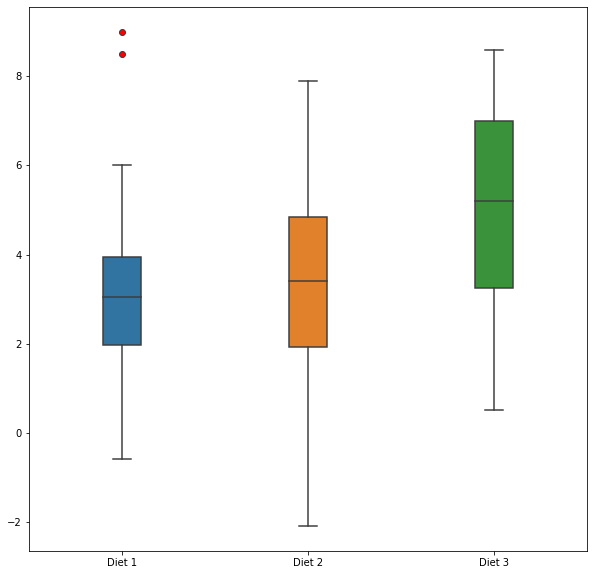

In [14]:
#Thống kê tóm tắt theo chế độ ăn uống
su_stat = df_diet.agg(
      {
          "Diet 1": ["min", "max", "mean", "median", "std"],
          "Diet 2": ["min", "max", "mean", "median", "std"],
          "Diet 3": ["min", "max", "mean", "median", "std"]
      }
).T
print(su_stat)
print("\n")
def box_plot(data): #vẽ đồ thị boxplot
  fig, ax = plt.subplots(figsize=(10,10))
  sns.boxplot(data= data,width=0.2, fliersize=12, flierprops = dict(marker=".",markerfacecolor='r'))
box_plot(df_diet)

**kiểm định ANOVA**